In [350]:
import pickle
import agent_givenseed
import environment_givenseed
import runner_givenseed
import graph
import logging
import numpy as np
import networkx as nx
import sys
from tools import *
import graph

In [351]:
lr = 1e-3
model = 'S2V_QN_1'
bs = 32
n_step = 3
use_cuda = False
environment_name = 'SIR'
verbose = True
node_n = 100
net = 'ba'
seeds = [46,55,3]


In [458]:
with open('data/graph_dic_'+str(10)+'_'+str(node_n)+'_'+ net,'rb') as f:
    graph_dic_ = pickle.load(f)  

In [459]:
# with open('community/m/graph_dic_community'+'_'+str(node_n),'rb') as f:
#     graph_dic_ = pickle.load(f)  

In [460]:
graph_dic = graph_dic_

In [461]:
agent_class = agent_givenseed.DQAgent(graph_dic, model, lr,bs,n_step,use_cuda)

#agent_class.load_model('./trained_models/model_2000_10_40_pl4_09_SIR.pt')
agent_class.load_model('./trained_models/model_5000_5_40er.pt')

/home/zhihao/Document/RLGNN/COLGE_/utils/config.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  model_config = yaml.load(config_file)


In [462]:
# agent_class = agent_givenseed.DQAgent(graph_dic, model, lr,bs,n_step,use_cuda)
# agent_class.load_model('./trained_models/500model_2000_10_40baer_SIRAVG.pt')


In [463]:
env_class = environment_givenseed.Environment(graph_dic,environment_name,0.3)

In [464]:
my_runner = runner_givenseed.Runner(env_class, agent_class,50,verbose)

In [465]:
results = my_runner.evaluate(500,seeds)


--------------------------------------------------start evaluation--------------------------------------------------
runtime for one graph is:  1.8489725589752197
runtime for one graph is:  1.8563170433044434
runtime for one graph is:  1.3650903701782227
runtime for one graph is:  1.3346643447875977
runtime for one graph is:  1.3128912448883057


# spreading similuation

In [466]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
from random import choice
from random import sample
#import powerlaw
from random import shuffle
import EoN


In [540]:

def spread_on_Gs(G_list,ini_num,times,N,seeds,tau=1.2,gamma=1):
    com_nodes = (G_list[-1].nodes)
    report_times = np.linspace(0,15,101)

    initial_infecteds = sample(list(com_nodes),ini_num)
    #initial_infecteds = seeds
    #res = []
    for i in range(len(G_list)):
        S,I,R = simulate_spread_times(G_list[i],tau, gamma,times,initial_infecteds,report_times)
        res = ([report_times,S/N,I/N,R/N])
    return np.array(res)
                     

def simulate_spread_times(G,tau, gamma,times,ini_infecteds,report_times):
    
    Ssum = np.zeros(len(report_times))
    Isum = np.zeros(len(report_times))
    Rsum = np.zeros(len(report_times))
    iterations = times
    for counter in range(iterations):
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds = ini_infecteds)
        newS, newI, newR = EoN.subsample(report_times, t, S, I, R)    
        Ssum += newS
        Isum += newI
        Rsum += newR
    Save = Ssum / float(iterations)
    Iave = Isum / float(iterations)
    Rave = Rsum / float(iterations)
    return Save,Iave,Rave
        

In [565]:
g_index = 1

In [566]:
G_list = []
g = graph_dic[g_index].g.copy()
for i in results[0][g_index]:
    g.remove_node(i)
    g_ = g.copy()
    G_list.append(g_)

In [567]:
G_list[-1-5].number_of_nodes()

75

In [568]:
# res_list = spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# for i in range(99):
#     res_list += spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# res_list = res_list / 100

In [569]:
#plt.plot(res_list[3][0][:65]*10, res_list[-1][2][:65],'--',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list[3][0][:65]*10, res_list[3][2][:65],'-',label = r'10% immunization with JN',color='red')
#plt.plot(res_list[12][0][:65]*10, res_list[3][2][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
#plt.plot(res_list[0][:65]*10, res_list[2][:65],'-',label = r'20% immunization with JN',color='blue')


In [570]:
#plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'--',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'-',label = r'10% immunization with JN',color='red')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
#plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='blue')


In [571]:
from random import choice
G_list_random = []
g = graph_dic[g_index].g.copy()
for _ in range(len(results[0][g_index])):
    i = choice(list(g.nodes))
    while i in seeds:
        i = choice(list(g.nodes))
    g.remove_node(i)
    g_ = g.copy()
    G_list_random.append(g_)
    

In [572]:
len(G_list_random)

30

In [573]:

# res_list_random = spread_on_Gs([G_list_random[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# for i in range(99):
#     res_list_random += spread_on_Gs([G_list_random[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# res_list_random = res_list_random / 100

In [574]:
#plt.plot(res_list_random[3][0][:65]*10, res_list_random[-1][3][:65],'-',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list_random[3][0][:65]*10, res_list_random[6][3][:65],'-',label = r'10% immunization with JN',color='red')
# plt.plot(res_list_random[0][:65]*10, res_list_random[3][:65],'-',label = r'20% immunization with JN',color='blue')


# #plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'-',label = r'10% immunization with FN',color='y')
# #plt.plot(res_list[3][0][:65]*10, res_list[6][3][:65],'-',label = r'10% immunization with JN',color='g')
# #plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
# plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='k')


In [575]:

G_list_greedy_degree = []
g = graph_dic[g_index].g.copy()

#for _ in range(len(results[0][0])):
deg_dict = dict(g.degree())
    #max_key = max(deg_dict, key=lambda key: deg_dict[key])
    #print(max_key)
    #if max_key not in [3]:
        #i = choice(list(g.nodes))
keys = sorted(deg_dict, key=lambda key: deg_dict[key])
for i in seeds:
    keys.remove(i)
       
g.remove_nodes_from(keys[-len(results[0][g_index]):])
g_ = g.copy()
G_list_greedy_degree.append(g_)

In [576]:
G_list_greedy_degree[0].number_of_nodes()

70

In [577]:
G_list_greedy_degree[0].number_of_edges()

71

In [578]:
G_list[-1].number_of_edges()

70

In [579]:
G_list[-1].number_of_nodes()

70

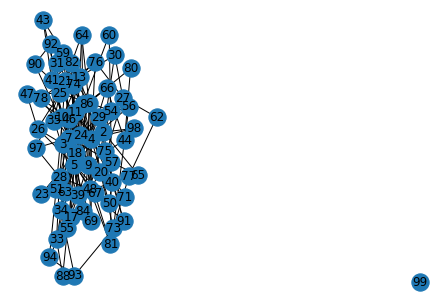

In [580]:
nx.draw(G_list_random[-1],with_labels=g.nodes)

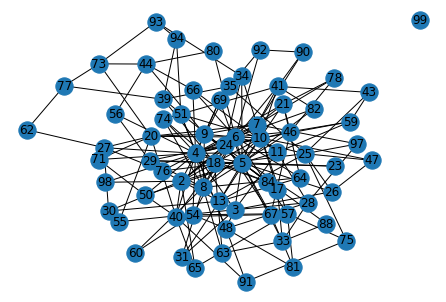

In [581]:

nx.draw(G_list_random[-1],pos = nx.nx_agraph.graphviz_layout(G_list_random[-1], prog="neato"),with_labels=g.nodes)

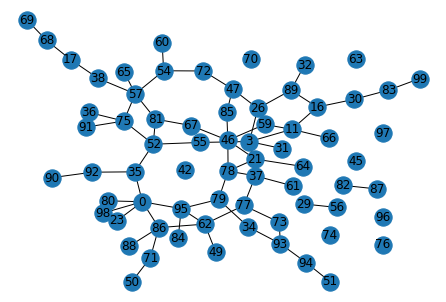

In [582]:
nx.draw(G_list_greedy_degree[0],pos = nx.nx_agraph.graphviz_layout(G_list_greedy_degree[0], prog="neato"),with_labels=g.nodes)

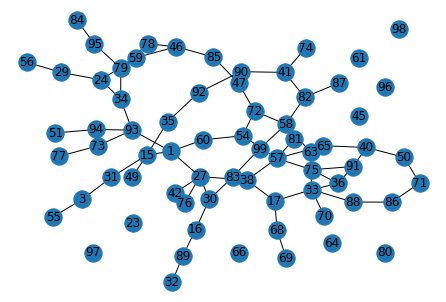

In [583]:

nx.draw(G_list[-1],pos = nx.nx_agraph.graphviz_layout(G_list[-1], prog="neato"),with_labels=g.nodes)

In [584]:
G_list[-1].nodes

NodeView((1, 3, 15, 16, 17, 23, 24, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [585]:
G_list_greedy_degree[0].nodes

NodeView((0, 3, 11, 16, 17, 21, 23, 26, 29, 30, 31, 32, 34, 35, 36, 37, 38, 42, 45, 46, 47, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

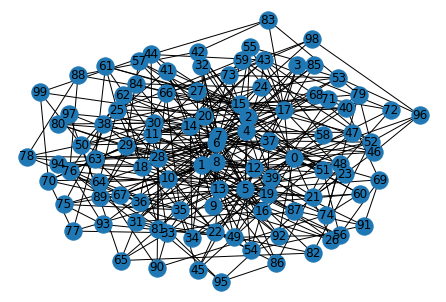

In [586]:
nx.draw(graph_dic[0].g,pos = nx.nx_agraph.graphviz_layout(graph_dic[0].g, prog="neato"),with_labels=g.nodes)

In [587]:
tau = 1.2
res_list_greedy_degree = spread_on_Gs([G_list_greedy_degree[0]],3,50,node_n,seeds,tau,gamma=1)
for i in range(99):
    res_list_greedy_degree += spread_on_Gs([G_list_greedy_degree[0]],3,50,node_n,seeds,tau,gamma=1)
res_list_greedy_degree = res_list_greedy_degree / 100


res_list = spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau,gamma=1)
for i in range(99):
    res_list += spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau,gamma=1)
res_list = res_list / 100

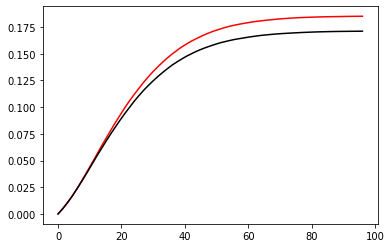

In [588]:
#plt.plot(res_list_greedy_degree[3][0][:65]*10, res_list_greedy_degree[-1][3][:65],'-',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list_greedy_degree[3][0][:65]*10, res_list_greedy_degree[3][3][:65],'-',label = r'10% immunization with JN',color='red')
plt.plot(res_list_greedy_degree[0][:65]*10, res_list_greedy_degree[3][:65],'-',label = r'20% immunization with JN',color='r')



#plt.plot(res_list_random[0][:65]*10, res_list_random[3][:65],'-',label = r'20% immunization with JN',color='blue')

#plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'-',label = r'10% immunization with FN',color='y')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'-',label = r'10% immunization with JN',color='g')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='k')

